In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [2]:
raw_data = pd.read_csv('cars_clus.csv')
raw_data

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,$null$,0.000,28.800,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000,2.864,0.0
155,Volvo,C70,3.493,$null$,0.000,45.500,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000,1.251,0.0
156,Volvo,S80,18.969,$null$,0.000,36.000,2.900,201.000,109.900,72.100,189.800,3.600,21.100,24.000,2.943,0.0
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0


* Here all the rows with null values are being deleted in the dataframe

In [16]:
print("Number of rows before deleting rows with 'NaN': ", raw_data.size)
raw_data_drop_rows = raw_data.dropna(axis=0)
print()
print("Number of rows after deleting rows with 'NaN': ", raw_data_drop_rows.size)



Number of rows before deleting rows with 'NaN':  2544

Number of rows after deleting rows with 'NaN':  2512


In [21]:
raw_data_drop_rows.isna().sum()

manufact      0
model         0
sales         0
resale       36
type          0
price         2
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       0
partition     0
dtype: int64

In [17]:
raw_data_drop_rows = raw_data_drop_rows.replace('$null$', np.nan)

print("Number of rows before deleting rows with 'null: ", raw_data_drop_rows.size)
raw_data_drop_rows_1 = raw_data_drop_rows.dropna(axis=0)
print()
print("Number of rows after deleting rows with 'null': ", raw_data_drop_rows_1.size)


Number of rows before deleting rows with 'null:  2512

Number of rows after deleting rows with 'null':  1872


In [22]:
raw_data_drop_rows_1.isna().sum()

manufact     0
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [23]:
raw_data_drop_rows_1

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
5,Audi,A6,18.780,23.555,0.000,33.950,2.800,200.000,108.700,76.100,192.000,3.561,18.500,22.000,2.933,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,9.761,11.425,0.000,14.900,2.000,115.000,98.900,68.300,163.300,2.767,14.500,26.000,2.278,0.0
146,Volkswagen,Jetta,83.721,13.240,0.000,16.700,2.000,115.000,98.900,68.300,172.300,2.853,14.500,26.000,4.427,0.0
147,Volkswagen,Passat,51.102,16.725,0.000,21.200,1.800,150.000,106.400,68.500,184.100,3.043,16.400,27.000,3.934,0.0
148,Volkswagen,Cabrio,9.569,16.575,0.000,19.990,2.000,115.000,97.400,66.700,160.400,3.079,13.700,26.000,2.259,0.0


### Normalization
Now we can normalize the feature set. __MinMaxScaler__ transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.

In [25]:
from sklearn.preprocessing import MinMaxScaler

X = raw_data_drop_rows_1.iloc[:,6:].values
minmax = MinMaxScaler()
X = minmax.fit_transform(X)
X

array([[0.11428571, 0.21518987, 0.18655098, ..., 0.43333333, 0.59235294,
        0.        ],
       [0.31428571, 0.43037975, 0.3362256 , ..., 0.33333333, 0.69176471,
        0.        ],
       [0.35714286, 0.39240506, 0.47722343, ..., 0.23333333, 0.51258824,
        0.        ],
       ...,
       [0.11428571, 0.24050633, 0.29934924, ..., 0.4       , 0.72247059,
        0.        ],
       [0.14285714, 0.15189873, 0.10412148, ..., 0.36666667, 0.52541176,
        0.        ],
       [0.14285714, 0.15189873, 0.13665944, ..., 0.36666667, 0.46223529,
        0.        ]])

In [26]:
import scipy
leng = X.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(X[i], X[j])

In [27]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

C:\Users\Arjun Janamatti\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 3,  8,  8,  7,  8,  5,  7,  8,  8,  8,  4,  8,  4,  4,  8,  3,  7,
        8,  8,  8,  5,  2, 12,  7,  7,  8,  7,  4,  3,  7,  7, 11, 10,  9,
       10,  6,  8,  2,  8,  7,  8,  6,  8,  6,  9,  8, 10,  2,  7,  7,  8,
        4,  2,  3,  7,  8,  1,  7,  8,  8,  8,  4,  4,  6,  2,  7,  7,  8,
        1,  5,  7,  7,  7,  8,  6,  8,  8,  7,  8,  4,  5,  3,  7,  8,  8,
        8,  7,  4,  8,  4,  3,  7,  8,  7,  7,  8,  8,  8,  7,  1,  1,  2,
        2,  3,  2,  7,  8,  3,  3,  3,  7,  9,  3,  3,  7,  3,  3],
      dtype=int32)

In [29]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 2, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

In [34]:
# fig = pylab.figure(figsize=(18,50))
# def llf(id):
#     return '[%s %s %s]' % (raw_data_drop_rows_1['manufact'][id], raw_data_drop_rows_1['model'][id], int(float(raw_data_drop_rows_1['type'][id])) )
    
# dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [46]:
agg_cluster = AgglomerativeClustering(n_clusters=6, linkage='complete')

In [47]:
agg_cluster.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=6,
                        pooling_func='deprecated')

In [48]:
raw_data_drop_rows_1['cluster'] = agg_cluster.labels_
raw_data_drop_rows_1

C:\Users\Arjun Janamatti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0,2
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0,1
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0,1
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0,2
5,Audi,A6,18.780,23.555,0.000,33.950,2.800,200.000,108.700,76.100,192.000,3.561,18.500,22.000,2.933,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,9.761,11.425,0.000,14.900,2.000,115.000,98.900,68.300,163.300,2.767,14.500,26.000,2.278,0.0,2
146,Volkswagen,Jetta,83.721,13.240,0.000,16.700,2.000,115.000,98.900,68.300,172.300,2.853,14.500,26.000,4.427,0.0,2
147,Volkswagen,Passat,51.102,16.725,0.000,21.200,1.800,150.000,106.400,68.500,184.100,3.043,16.400,27.000,3.934,0.0,2
148,Volkswagen,Cabrio,9.569,16.575,0.000,19.990,2.000,115.000,97.400,66.700,160.400,3.079,13.700,26.000,2.259,0.0,2


In [65]:
raw_data_drop_rows_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 17 columns):
manufact     117 non-null object
model        117 non-null object
sales        117 non-null object
resale       117 non-null object
type         117 non-null object
price        117 non-null object
engine_s     117 non-null object
horsepow     117 non-null object
wheelbas     117 non-null object
width        117 non-null object
length       117 non-null object
curb_wgt     117 non-null object
fuel_cap     117 non-null object
mpg          117 non-null object
lnsales      117 non-null object
partition    117 non-null float64
cluster      117 non-null int64
dtypes: float64(1), int64(1), object(15)
memory usage: 21.5+ KB


* Since integers and float are described as object in the pandas columns, hence we will convert them to numeric in the below operation

In [62]:
raw_data_drop_rows_2 = raw_data_drop_rows_1.iloc[:,6:].apply(pd.to_numeric, errors='coerce')

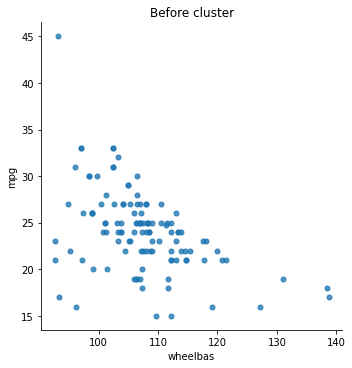

In [67]:
import seaborn as sns

sns.lmplot('wheelbas', 'mpg', 
           data=raw_data_drop_rows_2, 
           fit_reg=False, 
           scatter_kws={"marker": "D", 
                        "s": 25})
# plt.scatter(raw_data['Age'], raw_data["Income"], h)
plt.title("Before cluster")
plt.xlabel("wheelbas")
plt.ylabel("mpg")
plt.show()

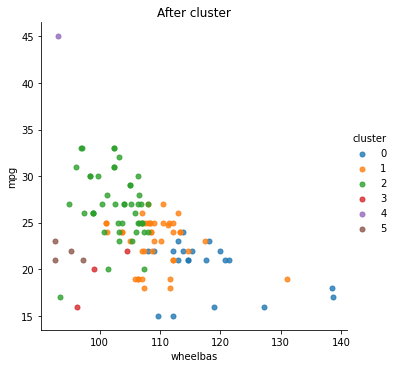

In [66]:
import seaborn as sns

sns.lmplot('wheelbas', 'mpg', 
           data=raw_data_drop_rows_2, 
           fit_reg=False, 
           hue='cluster',
           scatter_kws={"marker": "D", 
                        "s": 25})
# plt.scatter(raw_data['Age'], raw_data["Income"], h)
plt.title("After cluster")
plt.xlabel("wheelbas")
plt.ylabel("mpg")
plt.show()

In [76]:
dist_matrix = distance_matrix(X,X) 
print(dist_matrix)

[[0.         0.58626148 0.75876154 ... 0.31357356 0.25800778 0.22929462]
 [0.58626148 0.         0.28997132 ... 0.36218153 0.68400399 0.66301108]
 [0.75876154 0.28997132 0.         ... 0.55823561 0.81796147 0.78092622]
 ...
 [0.31357356 0.36218153 0.55823561 ... 0.         0.46210264 0.4419477 ]
 [0.25800778 0.68400399 0.81796147 ... 0.46210264 0.         0.16471904]
 [0.22929462 0.66301108 0.78092622 ... 0.4419477  0.16471904 0.        ]]


In [69]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Arjun Janamatti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


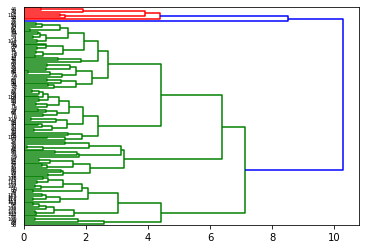

In [72]:
dendro = hierarchy.dendrogram(Z, orientation='right')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

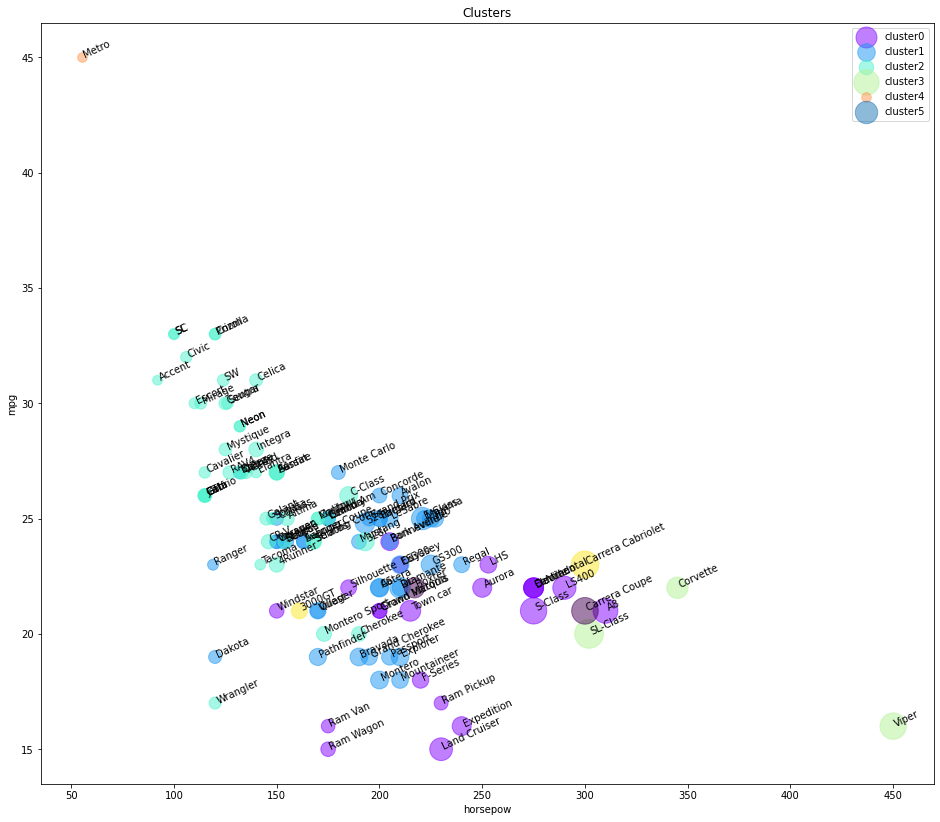

In [89]:
import matplotlib.cm as cm
n_clusters = max(agg_cluster.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = raw_data_drop_rows_1[raw_data_drop_rows_1.cluster == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [86]:
raw_data_drop_rows_1.iloc[:,2:] = raw_data_drop_rows_1.iloc[:,2:].apply(pd.to_numeric, errors='coerce')

C:\Users\Arjun Janamatti\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [87]:
raw_data_drop_rows_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 17 columns):
manufact     117 non-null object
model        117 non-null object
sales        117 non-null float64
resale       117 non-null float64
type         117 non-null float64
price        117 non-null float64
engine_s     117 non-null float64
horsepow     117 non-null float64
wheelbas     117 non-null float64
width        117 non-null float64
length       117 non-null float64
curb_wgt     117 non-null float64
fuel_cap     117 non-null float64
mpg          117 non-null float64
lnsales      117 non-null float64
partition    117 non-null float64
cluster      117 non-null int64
dtypes: float64(14), int64(1), object(2)
memory usage: 21.5+ KB
